<a href="https://colab.research.google.com/github/saiyedumairashraf/TSF_Task-1/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP : THE SPARKS FOUNDATION**

***Author : SAIYED UMAIR ASHRAF ***

 **Task-1 : Prediction using Supervised ML**

**Linear Regression with Python Scikit Learn**


In this section we will see how the Python Scikit learn library for machine learning can be used to implement regression functions.We will start by having two varibles.

**Problem Statement**

Predict the percentage of an student based on the number of study hours.This is a simple linear regression task as it involves just 2 variables



**To Predict :**
Predict the score if a student studied for 9.25hr/day

**Importing all the required libraries**

In [44]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

**Importing dataset from url**

In [25]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


**Exploring data and Visualizing**

In [26]:
data.head()   #to display the first five rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
data.describe()  #describing the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.isnull().sum() #checking for null values


Hours     0
Scores    0
dtype: int64

In [11]:
data.count()

Hours     25
Scores    25
dtype: int64

**Now lets do plotting of our dataset in 2-D**

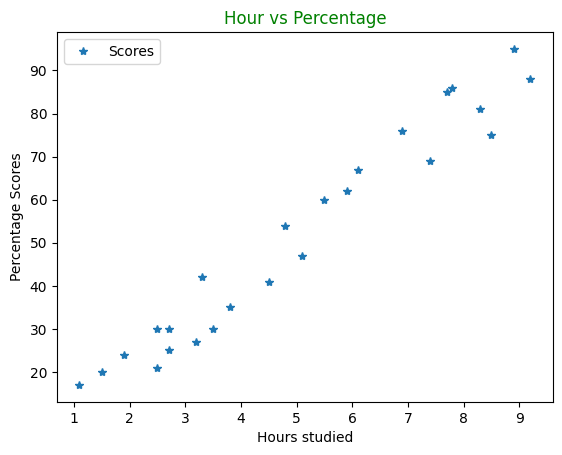

In [12]:
#plotting of data

data.plot(x='Hours' ,y='Scores' , style="*")
plt.title('Hour vs Percentage',color="green")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.show()

**Preparing the data for training define target(y) and features(x)**

The next step is to divide the data into "attributes"(inputs) and "labels" and splitting the data into training and test sets

In [13]:
y=data['Scores']
x=data[['Hours']]


In [14]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,...,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8


In [28]:
data.columns  #displaying coloumns

Index(['Hours', 'Scores'], dtype='object')

**Spliting the data into training and test sets by using scikit-learn built in train_test_split() method**

In [51]:
#importing the sklearn libraires
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
#import Linear Regression model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()
model.fit(x_train,y_train)
print("Training completed")

Training completed


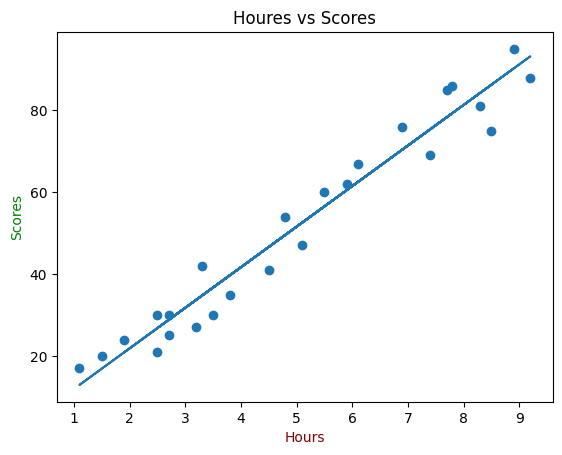

In [53]:
#Plotting the regression line
line=model.coef_*x_train+model.intercept_
plt.scatter(x,y)
plt.plot(x_train,line)
plt.xlabel('Hours',color='maroon')
plt.ylabel('Scores',color='green')
plt.title("Houres vs Scores")
plt.show()

**Intercept & Coefficient of model**

In [54]:
print('Intercept :',model.intercept_)


Intercept : 2.018160041434662


In [55]:
print('Coefficient :',model.coef_)

Coefficient : [9.91065648]


**Now we will do the prediction of model**

In [61]:
print(x_test)
y_pred=model.predict(x_test) #Predicting the scores
y_pred

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [57]:
hour=[9.25]
own_pr=model.predict([hour])
print("No. of hours = {}".format(hour))
print("Predicted Score = {}".format(own_pr[0]))

No. of hours = [9.25]
Predicted Score = 93.69173248737539


***Predicted Score = 93.69173248737539***

In [58]:
#Comparing actual vs predicted
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.**

**Evaluating the model**

In [59]:
#accuracy
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
